In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
train = pd.read_csv("C:/Users/keert/Downloads/train.csv")
test = pd.read_csv("C:/Users/keert/Downloads/test.csv")

In [4]:
print("Train dataset info:")
print(train.info())
print("\nTest dataset info:")
print(test.info())

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [5]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [6]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


test['Fare'].fillna(test['Fare'].median(), inplace=True)


train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)


train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [7]:
label_encoder = LabelEncoder()

train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])

train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
test['Embarked'] = label_encoder.transform(test['Embarked'])

In [8]:
# Feature Engineering
# Create FamilySize feature
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

# Drop SibSp and Parch as they're now represented by FamilySize
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

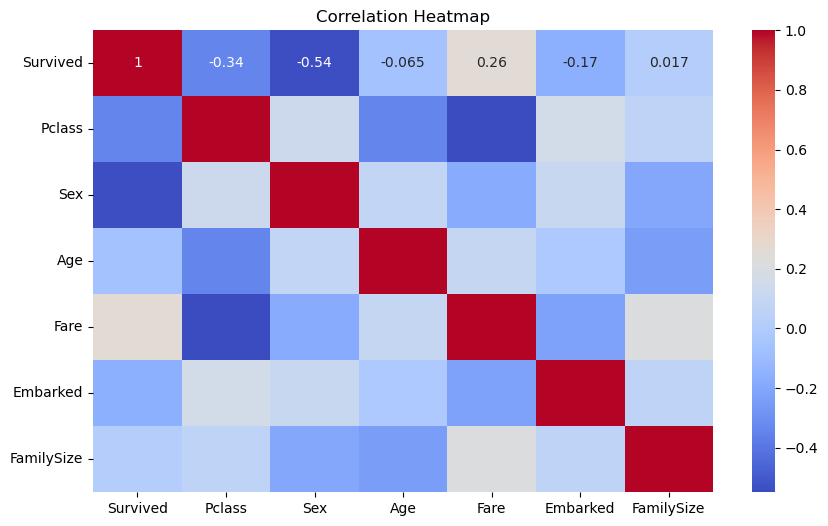

C:\Users\keert\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\keert\New folder\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int32' object has no attribute 'startswith'

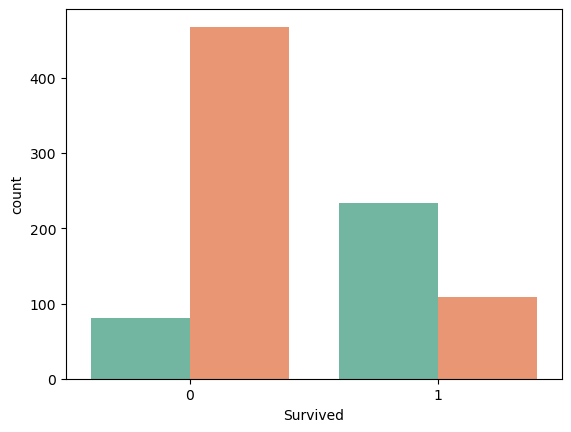

In [17]:
# Convert 'Survived' to categorical for Seaborn compatibility
train['Survived'] = train['Survived'].astype('category')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=train, palette='Set2')
plt.title("Survival by Gender")
plt.show()

# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=train, palette='Set1')
plt.title("Survival by Passenger Class")
plt.show()

# Survival by Age (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(train[train['Survived'] == 1]['Age'], kde=False, bins=30, color='green', label='Survived')
sns.histplot(train[train['Survived'] == 0]['Age'], kde=False, bins=30, color='red', label='Not Survived')
plt.legend()
plt.title("Survival by Age")
plt.show()


In [16]:
# Machine Learning
# Split data into features and target
X = train.drop("Survived", axis=1)
y = train["Survived"]

# Train/test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X.columns, index=X_val.index)
test = pd.DataFrame(scaler.transform(test), columns=X.columns)



# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_val)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))

# Predictions on test set (for Kaggle submission)
final_predictions = rf_model.predict(test)

# Create a submission file
submission = pd.DataFrame({
    "PassengerId": pd.read_csv("C:/Users/keert/Downloads/test.csv")["PassengerId"],
    "Survived": final_predictions
})

submission.to_csv("submission.csv", index=False)
print("Submission file created.")

Confusion Matrix:
 [[90 15]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy Score: 0.8212290502793296
Submission file created.
